## Sentiment analysis - IMDB Movie Dataset

### 50k movie reviews (Stanford dataset), 25k for training, 25k for testing

In [1]:
import pandas as pd
import numpy as np

#### Importing the dataset: 25k reviews for train set, 25k for test set

In [2]:
!git clone https://github.com/laxmimerit/IMDB-Movie-Reviews-Large-Dataset-50k.git

fatal: destination path 'IMDB-Movie-Reviews-Large-Dataset-50k' already exists and is not an empty directory.


In [3]:
df = pd.read_excel('D:\imdb\IMDB-Movie-Reviews-Large-Dataset-50k/train.xlsx')

In [51]:
print("Schema:\n\n",df.dtypes)
print("Number of questions,columns=",df.shape)

Schema:

 Reviews      object
Sentiment    object
dtype: object
Number of questions,columns= (25000, 2)


##### [Slower version] can initialize count vectorizer first, then get tfidf matrix from it (.fit)

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

In [55]:
cv=CountVectorizer(max_df=0.85,stop_words='english')
df['Reviews'] = [str (item) for item in df['Reviews']]
word_count_vector=cv.fit_transform(df['Reviews'])

In [56]:
list(cv.vocabulary_.keys())[:10]

['tuned',
 'morning',
 'news',
 'thought',
 'wow',
 'finally',
 'entertainment',
 'slightly',
 'amusing',
 'week']

In [57]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

##### [faster version] tfidf directly from reviews column .fit_transform()

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
from sklearn.model_selection import train_test_split

In [8]:
df.head

<bound method NDFrame.head of                                                  Reviews Sentiment
0      When I first tuned in on this morning news, I ...       neg
1      Mere thoughts of "Going Overboard" (aka "Babes...       neg
2      Why does this movie fall WELL below standards?...       neg
3      Wow and I thought that any Steven Segal movie ...       neg
4      The story is seen before, but that does'n matt...       neg
...                                                  ...       ...
24995  Everyone plays their part pretty well in this ...       pos
24996  It happened with Assault on Prescient 13 in 20...       neg
24997  My God. This movie was awful. I can't complain...       neg
24998  When I first popped in Happy Birthday to Me, I...       neg
24999  So why does this show suck? Unfortunately, tha...       neg

[25000 rows x 2 columns]>

##### Instantiate the vectorizer object // Create the transform

##### max_features: can build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

In [10]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000, max_df = 0.95, min_df = 0.05)

In [11]:
print (tfidf)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=5000, min_df=0.05,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)


In [12]:
X = df['Reviews']
y = df['Sentiment']

##### tfidf.fit_transform cannnot take in integers, so need to convert tokens into strings

In [13]:
X = [str (item) for item in X]
#X = [item for item in X if not isinstance(item, int)] #gives dimension inconsistency
#Y = [item for item in Y if not isinstance(item, int)]

##### tokenize and build vocab: Learn vocabulary and idf, return document-term matrix.

In [14]:
X = tfidf.fit_transform(X)

In [15]:
print(tfidf.vocabulary_)

{'thought': 215, 'finally': 75, 'face': 65, 'way': 236, 'playing': 162, 'time': 216, 'br': 23, 'woman': 239, 'got': 87, 'bit': 19, 'just': 108, 'really': 173, 'point': 165, 'watch': 233, 'good': 86, 'supposed': 207, 'quite': 170, 'say': 182, 'world': 244, 'best': 16, 'comes': 36, 'believe': 15, 'day': 41, 'young': 253, 'definitely': 44, 'people': 153, 'actually': 6, 'try': 221, 'hard': 91, 'entertaining': 61, 'll': 122, 'long': 123, 'doesn': 52, 'going': 85, 'make': 132, 'want': 230, 'better': 17, 'watching': 235, 'movie': 143, 'bad': 11, 'money': 142, 'does': 51, 'poor': 166, 'script': 187, 'looking': 125, 'black': 20, 'new': 147, 'rest': 177, 'film': 73, 'boring': 22, 'worth': 247, 'fun': 77, 'think': 214, 'plot': 164, 'little': 120, 'did': 46, 'understand': 224, 'like': 116, 'video': 229, 'overall': 152, 'couldn': 38, 'worse': 245, 'wrong': 249, 'story': 204, 'actors': 5, 'lot': 128, 'don': 54, 'girl': 81, 'felt': 72, 'acting': 2, 'years': 251, 'pretty': 167, 'stupid': 205, 'idea': 

##### Train Test splitting

In [17]:
X_train, X_Test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

#### [IGNORE] Using LinearSVC

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.svm import LinearSVC

In [18]:
clf = LinearSVC()
clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [19]:
y_pred = clf.predict(X_Test)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         neg       0.81      0.79      0.80      2480
         pos       0.80      0.82      0.81      2520

   micro avg       0.80      0.80      0.80      5000
   macro avg       0.80      0.80      0.80      5000
weighted avg       0.80      0.80      0.80      5000



#### Using KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
model = KNeighborsClassifier(n_neighbors=2)

In [23]:
model.fit(X_train, y_train) #Fitting model on entire dataset X

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [24]:
y_pred = model.predict(X_Test) # Predicting

In [29]:
print(y_pred)

['neg' 'neg' 'neg' ... 'neg' 'neg' 'neg']


#### Evaluate the predictions using Classification Report

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         neg       0.59      0.83      0.69      2480
         pos       0.72      0.43      0.54      2520

   micro avg       0.63      0.63      0.63      5000
   macro avg       0.65      0.63      0.61      5000
weighted avg       0.65      0.63      0.61      5000



In [26]:
type(model)

sklearn.neighbors.classification.KNeighborsClassifier

In [28]:
result = model.score(X_Test, y_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

Accuracy - test set: 62.76%


##### Confusion matrix

In [30]:
from sklearn.metrics import confusion_matrix

In [32]:
# Print out confusion matrix
cmat = confusion_matrix(y_test, y_pred)

In [33]:
#print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TP - True Negative 2054
FP - False Positive 426
FN - False Negative 1436
TP - True Positive 1084
Accuracy Rate: 0.6276
Misclassification Rate: 0.3724


##### Evaluate alternative K values

In [44]:
error_rate = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_Test)
    error_rate.append(np.mean(pred_i != y_test))

In [42]:
from matplotlib.pyplot import *
import matplotlib.pyplot as plt

Text(0, 0.5, 'Error Rate')

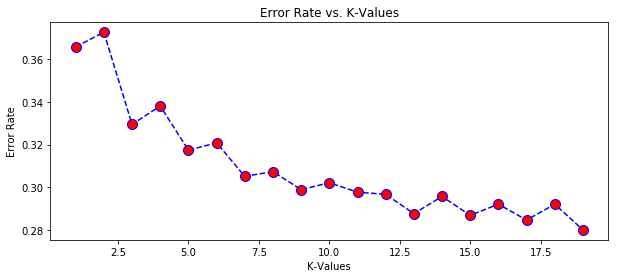

In [46]:
# Configure and plot error rate over k values
plt.figure(figsize=(10,4))
plt.plot(range(1,20), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')

In [47]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
pred = knn.predict(X_Test)

In [48]:
# Print out classification report and confusion matrix
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         neg       0.70      0.73      0.71      2480
         pos       0.72      0.70      0.71      2520

   micro avg       0.71      0.71      0.71      5000
   macro avg       0.71      0.71      0.71      5000
weighted avg       0.71      0.71      0.71      5000



In [49]:
# Print out confusion matrix
cmat = confusion_matrix(y_test, pred)
#print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TP - True Negative 1803
FP - False Positive 677
FN - False Negative 762
TP - True Positive 1758
Accuracy Rate: 0.7122
Misclassification Rate: 0.2878
